In [1]:
import turicreate

In [2]:
sf = turicreate.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv')

Finished parsing file /home/jovyan/work/Week 1/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.033448 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jovyan/work/Week 1/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.032062 secs.

In [3]:
sf


HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [4]:
turicreate.show(sf['CrimeRate'],sf['HousePrice'],xlabel='Crime Rate',ylabel='House Price')

Materializing X axis SArray

Materializing Y axis SArray

In [6]:
crime_model = turicreate.linear_regression.create(sf, target='HousePrice',features=['CrimeRate'],validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 99

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.001417     | 314982.574662      | 83468.940148                    |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

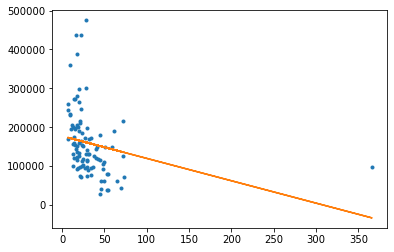

In [11]:
plt.plot(sf['CrimeRate'],sf['HousePrice'],'.',
        sf['CrimeRate'],crime_model.predict(sf),'-')

In [12]:
sf_cleaned = sf[sf['MilesPhila'] != 0.0]
crime_model_c = turicreate.linear_regression.create(sf_cleaned, target='HousePrice',features=['CrimeRate'])

Linear regression:

--------------------------------------------------------

Number of examples          : 98

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.001342     | 315335.534886      | 78052.676125                    |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

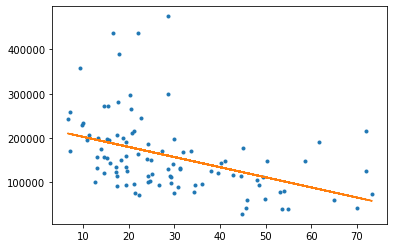

In [15]:
plt.plot(sf_cleaned['CrimeRate'],sf_cleaned['HousePrice'],'.',
        sf_cleaned['CrimeRate'],crime_model_c.predict(sf_cleaned),'-')

In [17]:
coefficients_1 = crime_model.coefficients
coefficients_2 = crime_model_c.coefficients
print('{}, {}'.format(coefficients_1, coefficients_2))

+-------------+-------+--------------------+--------------------+
|     name    | index |       value        |       stderr       |
+-------------+-------+--------------------+--------------------+
| (intercept) |  None | 176626.04688088188 | 11245.588219378817 |
|  CrimeRate  |  None | -576.8049490581091 | 226.9022595096533  |
+-------------+-------+--------------------+--------------------+
[2 rows x 4 columns]
, +-------------+-------+---------------------+--------------------+
|     name    | index |        value        |       stderr       |
+-------------+-------+---------------------+--------------------+
| (intercept) |  None |  225204.60430309852 | 16404.024751386656 |
|  CrimeRate  |  None | -2287.6971744328976 | 491.53747812308956 |
+-------------+-------+---------------------+--------------------+
[2 rows x 4 columns]



In [18]:
sf_nohigh = sf_cleaned[sf_cleaned['HousePrice'] < 350000]
crime_model_nohigh = turicreate.linear_regression.create(sf_nohigh, target='HousePrice',features=['CrimeRate'])

Linear regression:

--------------------------------------------------------

Number of examples          : 93

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.001246     | 153105.996748      | 54958.023447                    |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [19]:
coefficients_3 = crime_model_nohigh.coefficients
print(coefficients_3)

+-------------+-------+--------------------+--------------------+
|     name    | index |       value        |       stderr       |
+-------------+-------+--------------------+--------------------+
| (intercept) |  None | 199073.58961525137 | 11932.510110455862 |
|  CrimeRate  |  None | -1837.712809888728 | 351.5196093328532  |
+-------------+-------+--------------------+--------------------+
[2 rows x 4 columns]



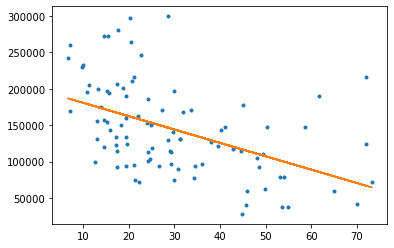

In [21]:
plt.plot(sf_nohigh['CrimeRate'],sf_nohigh['HousePrice'],'.',
        sf_nohigh['CrimeRate'],crime_model_nohigh.predict(sf_nohigh),'-')